In [2]:
import os
import tensorflow as tf
import IPython.display as display
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools

In [39]:
from keras import backend
from keras.models import Model
from keras.applications.vgg19 import VGG19

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [184]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for sp in uploaded.keys():

  style_path = '/content/' + sp
 
  
content_path = "/content/drive/My Drive/NeuralStyleTransfer/foto.jpeg"  

Saving pablo.jpg to pablo (1).jpg


In [185]:
mpl.rcParams['figure.figsize'] = (15, 15)
mpl.rcParams['axes.grid'] = False

In [186]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [187]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [188]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

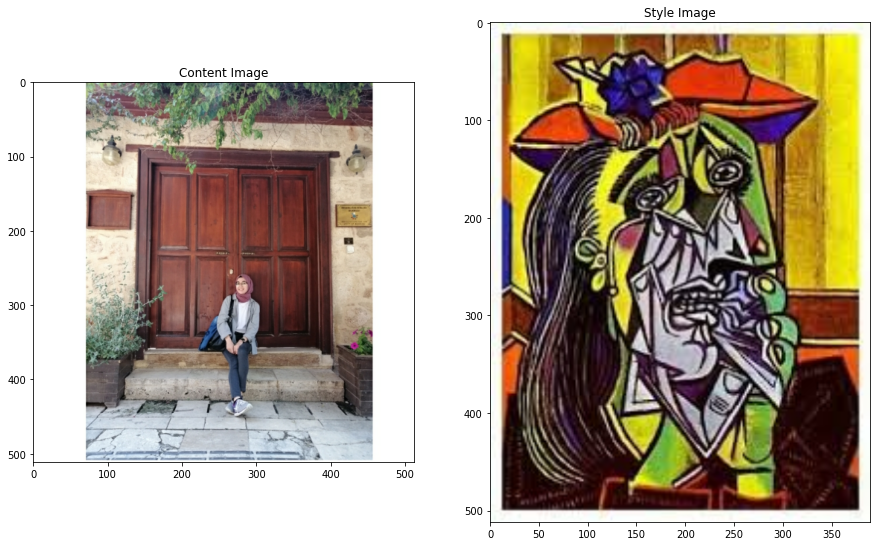

In [189]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

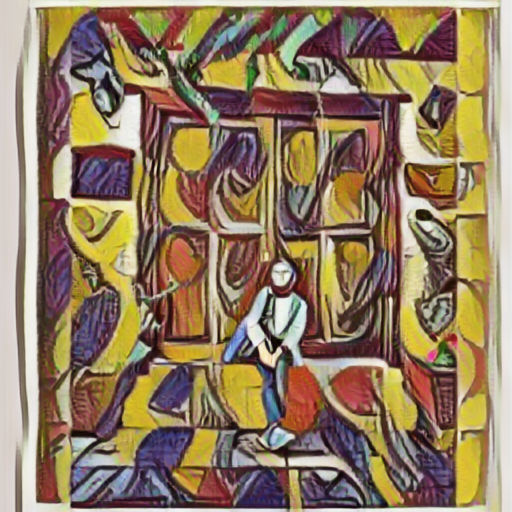

In [190]:
# Tensorflow Hub kullanarak hızlı bir şekilde stil aktarımı yapabiliriz.

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)